<a href="https://colab.research.google.com/github/panimesh14/Deep-Learning-/blob/main/CNN_Image_Classifcation_based_Malaria_Diagnostic_Model_on_Red_Blood_Cells_Thin_section_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Malaria Diagnostic model using CNN Image Classification Model on Red Blood Cell Thin Section

#Uploading, unzipping data file-cell_images.zip

In [1]:

#change to MyDrive
import os
zip_path='/content/drive/MyDrive/Cell_malaria_dataset/Copy of cell_images.zip'

In [2]:
#copy zip file to present directory 
!cp '{zip_path}' -r '{os.getcwd()}'
#unzip zip file
!unzip -q 'Copy of cell_images.zip'
#chwck contents of directory 
os.listdir()

['.config', 'cell_images', 'Copy of cell_images.zip', 'drive', 'sample_data']

In [3]:
data_dir=os.getcwd();
data_dir=data_dir+'/cell_images'
os.listdir(data_dir)
#Successfully extracted

['test', 'train']

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

In [5]:

#modifying paths to test and train folders
test_path=data_dir+'/test'
train_path=data_dir+'/train'

DATA EXPLORATION

In [6]:
#dirwctoriws in test path
os.listdir(test_path)

['uninfected', 'parasitized']

In [7]:
#folders in train directory
os.listdir(train_path)

['uninfected', 'parasitized']

In [8]:
#Data Exploration
#Peaking into files inside train directory
filename_img=os.listdir(train_path+'/parasitized')[0]
filename_img
#file names visible

'C136P97ThinF_IMG_20151005_141946_cell_120.png'

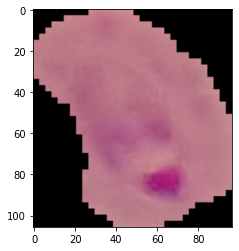

In [9]:
#Peeking into image file
para_cell_image=train_path+'/parasitized/'+filename_img;
plt.imshow(imread(para_cell_image))
#dark pink spot maybe implying disease as compared to the uninfected image

In [10]:
imread(para_cell_image).shape

(106, 97, 3)

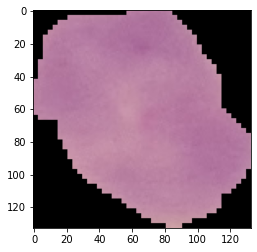

In [11]:
#peeking into uninfected cell image
uninfected_filename_img=os.listdir(train_path+'/uninfected')[0]
uninf_cell_image=train_path+'/uninfected/'+uninfected_filename_img;
plt.imshow(imread(uninf_cell_image))

In [12]:
#number of infected or parasatized samples of RBCs in Training data
len(os.listdir(train_path+'/parasitized/'))

12480

In [13]:
#number of uninfected samples of RBCs in Training Data
len(os.listdir(train_path+'/uninfected/'))

12480

In [14]:
#number of infected or parasatized samples of RBCs in Testing data
len(os.listdir(test_path+'/parasitized/'))

1300

In [15]:
#number of uninfected samples of RBCs in Testing Data
len(os.listdir(test_path+'/uninfected/'))

1300


#####Balanced Dataset as clear from above
######1300 test points and 12480 train points for each class

DATA PREPARATION

In [16]:
#Finding Average size of all available images for prediction and Image Data Generator
dim1=[];
dim2=[];
for img_filename in os.listdir(test_path+'/uninfected/'):
    img=imread(test_path+'/uninfected/'+img_filename);
    d1,d2,d3=img.shape;
    dim1.append(d1)
    dim2.append(d2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


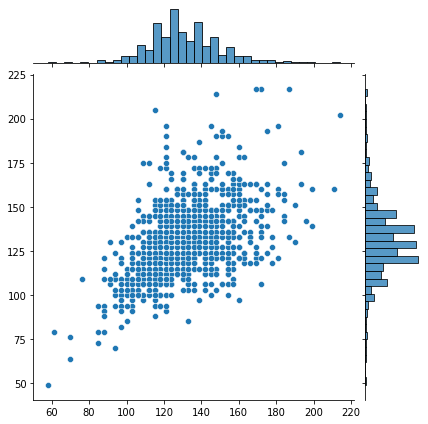

In [17]:
sns.jointplot(dim1,dim2)
#high variability in dimensions as visible

In [18]:

#mean dimensions as average for variability 
mean_dim1=int(np.mean(dim1))
mean_dim2=int(np.mean(dim2))

In [19]:
image_shape=(mean_dim1,mean_dim2,d3)
mean_dim1*mean_dim2*d3
#huge number of sample points when all data is taken into account,i.e.,50700×(24960+2600)

50700

In [20]:
#Image Data Generator

#Given the large number of dimensions and the number of samples, it is better to feed data in batches and so ImageDataGenerator is used
#Image Data Generator also augments the samples by rotation in degrees, stretching width and height, rescaling the images, shearing or cutting images,zooming images,flipping images
from tensorflow.keras.preprocessing.image import ImageDataGenerator
image_generator=ImageDataGenerator(rotation_range=40,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   rescale=1,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

Text(0.5, 1.0, 'Randomly Transformed Image')

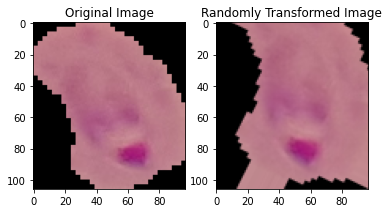

In [21]:
#Plotting and comparing original and transformed image
plt.subplot(1,2,1)
plt.imshow(imread(para_cell_image))
plt.title('Original Image')
plt.subplot(1,2,2)
plt.imshow(image_generator.random_transform(imread(para_cell_image))) 
plt.title('Randomly Transformed Image')
#moďified image

In [22]:
#flowing all training images into image generator or Image Data Generator 
image_generator.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [23]:
#flowing all testing images into image data generator
image_generator.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


MODEL BUILDING

In [24]:

#Model Building
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
cell_model=Sequential()
cell_model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=image_shape,activation='relu'))
cell_model.add(MaxPool2D(pool_size=(2,2)))
#convolution layer 2
cell_model.add(Conv2D(filters=64,kernel_size=(4,4),input_shape=image_shape,activation='relu'))
cell_model.add(MaxPool2D(pool_size=(2,2)))
#convolution layer 3
cell_model.add(Conv2D(filters=128,kernel_size=(4,4),input_shape=image_shape,activation='relu'))
cell_model.add(MaxPool2D(pool_size=(2,2)))
#convolution layer 4
cell_model.add(Conv2D(filters=128,kernel_size=(4,4),input_shape=image_shape,activation='relu'))
cell_model.add(MaxPool2D(pool_size=(2,2)))
#flatten
cell_model.add(Flatten())
#MLP
cell_model.add(Dense(128,activation='relu'))
cell_model.add(Dropout(0.5))
cell_model.add(Dense(1,activation='sigmoid'))
cell_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
cell_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 127, 127, 32)      1568      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 64)        32832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 27, 27, 128)       131200    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 128)      0

In [25]:
#Early stopping 
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',patience=2)

In [26]:
batch_size=16;#batch size of images to be feeded

In [27]:
train_img_generator=image_generator.flow_from_directory(train_path,
target_size=image_shape[:2],
color_mode='rgb',
batch_size=batch_size,
class_mode='binary')

Found 24958 images belonging to 2 classes.


In [39]:
test_img_generator=image_generator.flow_from_directory(test_path,target_size=image_shape[:2],
color_mode='rgb',
batch_size=batch_size,
class_mode='binary',shuffle=False)

Found 2600 images belonging to 2 classes.


In [50]:
#class indices to labels
train_img_generator.class_indices

{'parasitized': 0, 'uninfected': 1}

In [30]:
,#Fitting model weights
results=cell_model.fit(train_img_generator,epochs=20,validation_data=test_img_generator,callbacks=[early_stop])

Epoch 1/20
1560/1560 [==============================] - 1278s 819ms/step - loss: 0.3795 - accuracy: 0.8594 - val_loss: 0.2346 - val_accuracy: 0.9231
Epoch 2/20
1560/1560 [==============================] - 1273s 816ms/step - loss: 0.2379 - accuracy: 0.9261 - val_loss: 0.2260 - val_accuracy: 0.9300
Epoch 3/20
1560/1560 [==============================] - 1258s 806ms/step - loss: 0.2398 - accuracy: 0.9265 - val_loss: 0.1887 - val_accuracy: 0.9415
Epoch 4/20
1560/1560 [==============================] - 1288s 825ms/step - loss: 0.2033 - accuracy: 0.9381 - val_loss: 0.2188 - val_accuracy: 0.9296
Epoch 5/20
1560/1560 [==============================] - 1335s 856ms/step - loss: 0.1960 - accuracy: 0.9395 - val_loss: 0.1966 - val_accuracy: 0.9388


In [31]:
#MODEL EVALUATION (loss and accuracy as defined above in model)
cell_model.evaluate_generator(test_img_generator)
#~94.1% accuracy and loss=0.19

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  


[0.19338853657245636, 0.9411538243293762]

MODEL PREDICTIONS

In [42]:
#Model Predictions
y_hat=cell_model.predict_generator(test_img_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


In [45]:
#Converting probability vector to class vector 
alpha=0.3;#arbitrary threshold here for classifying infected individuals
y_pred=np.where(y_hat<alpha,0,1)
y_pred[0:5]

array([[0],
       [0],
       [0],
       [0],
       [1]])

MODEL EVALUATION

In [47]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(test_img_generator.classes,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93      1300
           1       0.90      0.97      0.94      1300

    accuracy                           0.93      2600
   macro avg       0.94      0.93      0.93      2600
weighted avg       0.94      0.93      0.93      2600



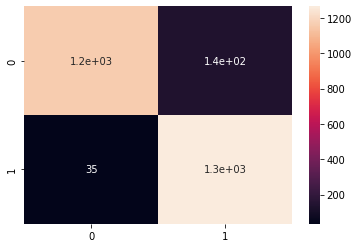

In [49]:
sns.heatmap(confusion_matrix(test_img_generator.classes,y_pred),annot=True)
#with assumed alpha, model False positives are more than false negatives
#chances of type-2 error or beta risk are less,i.e., chances of failing to reject a false null hypothesis is low
#Since model is diagnostic of disease, a low beta or Type-2 risk is desirable 
#Given disease diagnostic model, High alpha or Type-I risk, chances of rejecting null hypothesis when true is somewhat tolerable as it allows further testing for confirmation and reduces chances of misclasaifying diseased individuals as healthy